In [1]:
from google.colab import files

uploaded = files.upload()


Saving ushape.csv to ushape.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:


df = pd.read_csv('ushape.csv')
df.head()


,x1,x2,label
0,0.1,0.10,0
1,0.2,0.10,0
2,0.3,0.15,0
3,0.4,0.25,0
4,0.5,0.40,0


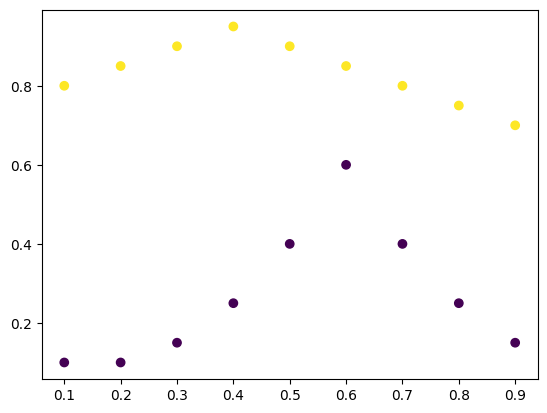

In [5]:
plt.scatter(df['x1'] ,df['x2'],c=df['label'])

In [6]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.get_weights()

[array([[ 1.2055441 ,  0.30590153],
        [-0.7146108 ,  0.46449327]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.613383  ],
        [-0.03850198]], dtype=float32),
 array([0.], dtype=float32)]

In [12]:
initial_weights = model.get_weights()

In [13]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [14]:
model.set_weights(initial_weights)

In [16]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [17]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [18]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6429 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6936
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6429 - loss: 0.6930 - val_accuracy: 0.0000e+00 - val_loss: 0.6941
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6429 - loss: 0.6929 - val_accuracy: 0.0000e+00 - val_loss: 0.6946
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6429 - loss: 0.6927 - val_accuracy: 0.0000e+00 - val_loss: 0.6951
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6429 - loss: 0.6926 - val_accuracy: 0.0000e+00 - val_loss: 0.6956
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6429 - loss: 0.6924 - val_accuracy: 0.0000e+00 - val_loss: 0.6962
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6429 - loss: 0.6923 - val_accuracy: 0.0000e+00 - val_loss: 0.6967
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6429 - loss: 0.6922 - val_ac

In [19]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.09687767], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

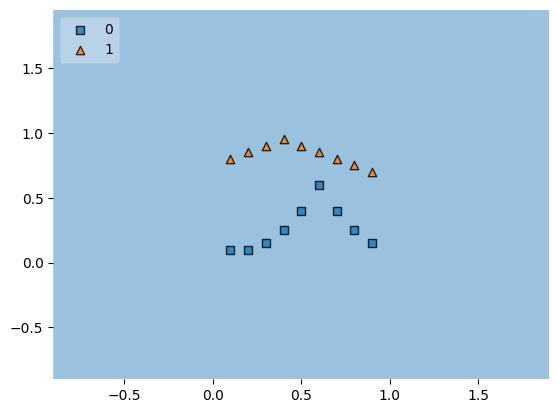

In [20]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model, legend = 2)